# Importação dos módulos

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

## Datasets: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [2]:
# Casos confirmados
arquivo_confirmados = r"\Users\Gabriel Gregorio\Desktop\time_series_2019-ncov-Confirmed.csv"
# Arquivo: https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv

In [3]:
# Mortes pelo Coronavirus
arquivo_mortes = r"\Users\Gabriel Gregorio\Desktop\time_series_2019-ncov-Deaths.csv"
# Arquivo: https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv&filename=time_series_2019-ncov-Deaths.csv

In [4]:
# Recuperações
arquivo_recuperados = r"\Users\Gabriel Gregorio\Desktop\time_series_2019-ncov-Recovered.csv"
# Arquivo: https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Recovered.csv&filename=time_series_2019-ncov-Recovered.csv

# Abertura dos arquivos

In [5]:
df_mortes = pd.read_csv(arquivo_mortes)
df_confirmados = pd.read_csv(arquivo_confirmados)
df_recuperados = pd.read_csv(arquivo_recuperados)

### Confirmados

In [6]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


### Mortes

In [7]:
df_mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,3,4


### Recuperados

In [8]:
df_recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,35,35,35,35,41,42,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,144,144,144,150,191,232
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,97,105,105,109,114,114,114,124,140
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,35,42,42,49,60,75,87,114


## Exibção de gráficos

In [9]:
def plotar_grafico(dataframe, arquivo, xlabel, ylabel, minimo):
    # Formatação das datas
    data_dias = [ datetime.strptime(str(dataframe.columns[x + 4]), '%m/%d/%y') for x in range(len(dataframe.columns) -4 )]

    # Linhas de um dataframe
    linhas = len(dataframe)

    # Definir rotação nos Labels
    plt.tick_params(axis='x', rotation=45)

    # Andar pelo Dataframe
    for linha in range(1, linhas):

        # Número de casos, eliminando as 4 primeiras colunas (Não dias)
        casos = list( dataframe.loc[linha][4:])

        # Legenda, obter o nome do pais/região
        provincia = str(dataframe.loc[linha]["Province/State"])
        
        # Se não tiver dados
        if provincia == "nan":
            legenda = str(dataframe.loc[linha]["Country/Region"])
        else:
            legenda = provincia + " - " + str(dataframe.loc[linha]["Country/Region"])

        # Somente paises com mais de 1900 casos e que não sejam a china
        if max(casos) < minimo:
            continue

        # plotas os dias, os casos e a região
        plt.plot(data_dias, casos, label = legenda)
        plt.legend()

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(arquivo + '.png', dpi=300)
    plt.show()


# Ajustar o tamanho dos gráficos

In [10]:
plt.rcParams['figure.figsize'] = (10,7)

### Plotar o gráfico dos paises em relação aos casos confirmados

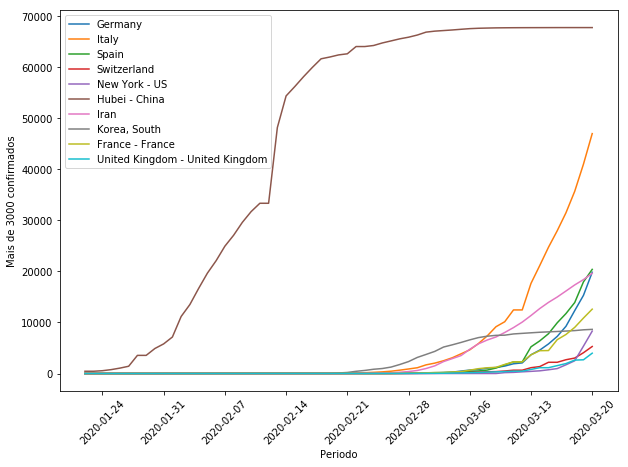

In [11]:
plotar_grafico(df_confirmados, 'casos_confirmados', 'Periodo', 'Mais de 3000 confirmados', 3000)

### Plotar o gráfico dos paises em relação as mortes

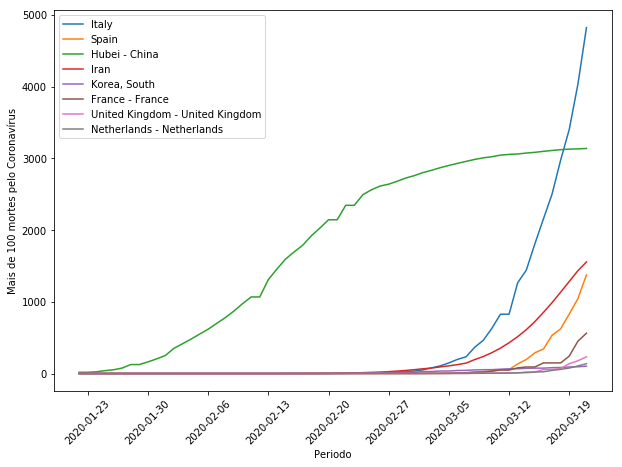

In [12]:
plotar_grafico(df_mortes, 'grafico_mortes', 'Periodo', 'Mais de 100 mortes pelo Coronavírus', 100)

### Plotar o gráfico dos paises em relação as Recuperações

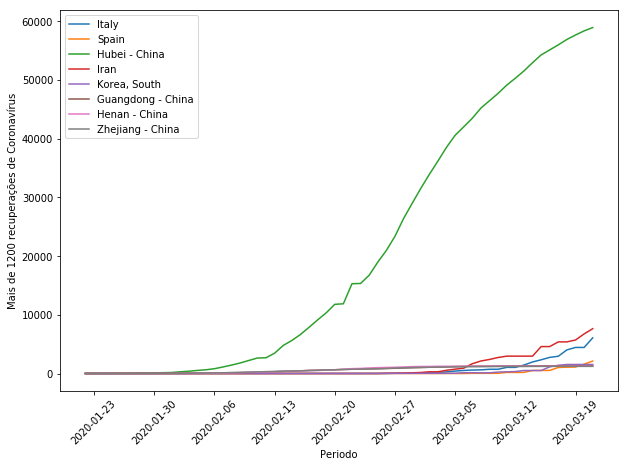

In [13]:
plotar_grafico(df_recuperados, 'grafico_recuperacoes', 'Periodo', 'Mais de 1200 recuperações de Coronavírus', 1200)

In [14]:
# Dias para ignorar na análise
dias_ignorar = 30

In [15]:
def dataFrameLista(dataframe, regiao, dias_ignorar):
    lista = list(dataframe.loc[ dataframe['Country/Region'] == regiao].values)
    return list(lista[0][4 + dias_ignorar:])

In [16]:
# Dias do Dataframe
data_dias_confirmados = [ datetime.strptime(str(df_confirmados.columns[x + 4 + dias_ignorar]), '%m/%d/%y') for x in range(0, len( list(df_confirmados.columns[4 + dias_ignorar:]) )  )]
data_dias_mortes = [ datetime.strptime(str(df_mortes.columns[x + 4 + dias_ignorar]), '%m/%d/%y') for x in range(0, len( list(df_mortes.columns[4 + dias_ignorar:]) )  )]
data_dias_recuperaco = [ datetime.strptime(str(df_recuperados.columns[x + 4 + dias_ignorar]), '%m/%d/%y') for x in range(0, len( list(df_recuperados.columns[4 + dias_ignorar:]) )  )]

# Ajustar o tamanho dos gráficos

In [17]:
plt.rcParams['figure.figsize'] = (20,15)

# Obtendo os valores para análise

In [18]:
casosItalia = dataFrameLista(df_confirmados, 'Italy', dias_ignorar)
casosCoreia = dataFrameLista(df_confirmados, 'Korea, South', dias_ignorar)

mortesItalia = dataFrameLista(df_mortes, 'Italy', dias_ignorar)
mortesCoreia = dataFrameLista(df_mortes, 'Korea, South', dias_ignorar)

recuperacaoItalia = dataFrameLista(df_recuperados, 'Italy', dias_ignorar)
recuperacaoCoreia = dataFrameLista(df_recuperados,  'Korea, South', dias_ignorar)

# Casos vs Mortes

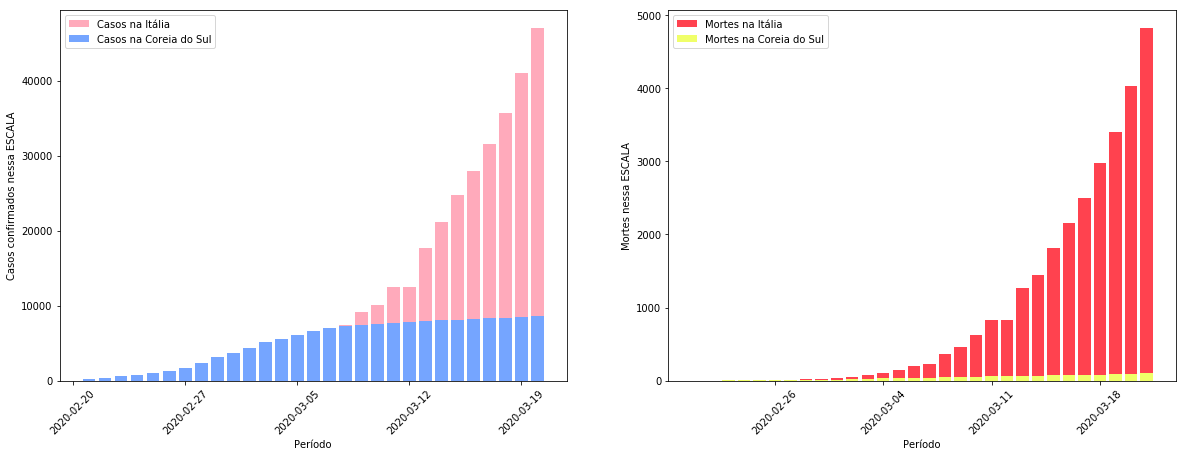

In [19]:
# Primeiro plot
plt.subplot(2,2,1)

# Rotação dos labels
plt.xticks(rotation=45)

# Plotagem do primeiro gráfico
plt.bar(data_dias_confirmados, casosItalia, color="#ffaabb", label = "Casos na Itália")
plt.bar(data_dias_confirmados, casosCoreia, color="#75a5ff", label = "Casos na Coreia do Sul")

# Exibição da legenda
plt.legend()

# Exibição dos labels
plt.xlabel('Período')
plt.ylabel('Casos confirmados nessa ESCALA')

# Segundo plot
plt.subplot(2,2,2)

# Rotação dos labels
plt.xticks(rotation=45)

# Plotagem do segundo gráfico
plt.bar(data_dias_mortes, mortesItalia, color="#ff424f", label = "Mortes na Itália")
plt.bar(data_dias_mortes, mortesCoreia, color="#f0ff69", label = "Mortes na Coreia do Sul")
plt.legend()

plt.xlabel('Período')
plt.ylabel('Mortes nessa ESCALA')

plt.savefig('casos_vs_mortes.png', dpi=300)

plt.show()

# Ajustar o tamanho dos gráficos

In [20]:
plt.rcParams['figure.figsize'] = (12,7)

# Recuperação Itália vs Coreia do Sul

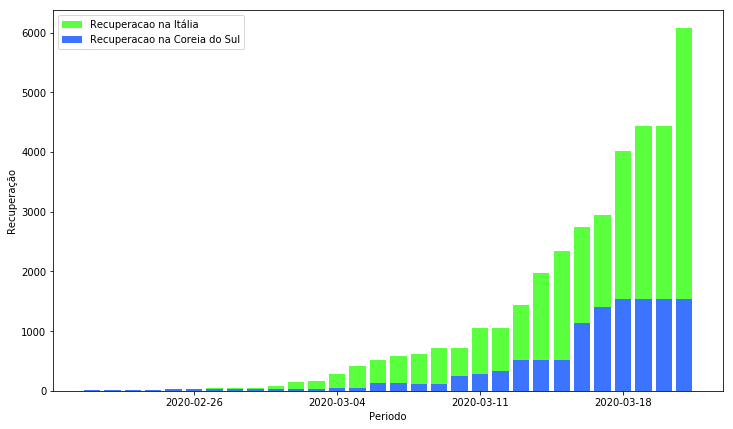

In [21]:
plt.bar(data_dias_recuperaco, recuperacaoItalia, color="#5aff3d", label = "Recuperacao na Itália")
plt.bar(data_dias_recuperaco, recuperacaoCoreia, color="#3d74ff", label = "Recuperacao na Coreia do Sul")
plt.legend()

plt.xlabel('Periodo')
plt.ylabel('Recuperação')

plt.savefig('recuperacao_coreia_italia.png', dpi=300)

plt.show()

# Confirmados - mortes - recuperação na Italia

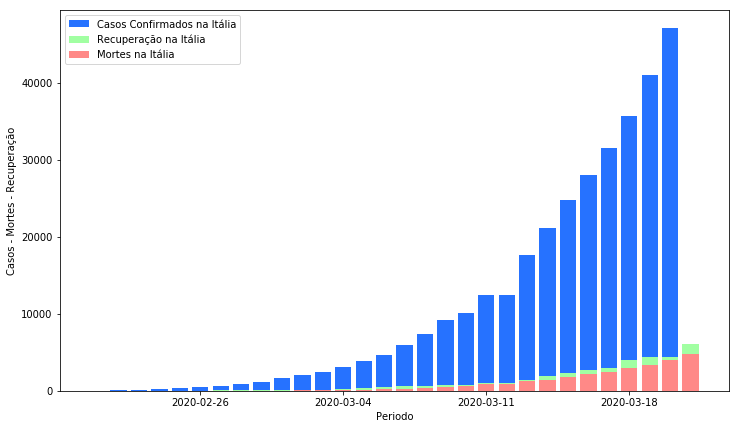

In [22]:
plt.bar(data_dias_confirmados, casosItalia,       color="#2672ff", label = "Casos Confirmados na Itália")
plt.bar(data_dias_recuperaco,  recuperacaoItalia, color="#a1ffa2", label = "Recuperação na Itália")
plt.bar(data_dias_mortes,      mortesItalia,      color="#ff8987", label = "Mortes na Itália")
plt.legend()

plt.xlabel('Periodo')
plt.ylabel('Casos - Mortes - Recuperação')

plt.savefig('Casos-Mortes-Recuperação na Itália.png', dpi=300)

plt.show()

# Confirmados - mortes - recuperação na Italia Coreia do Sul

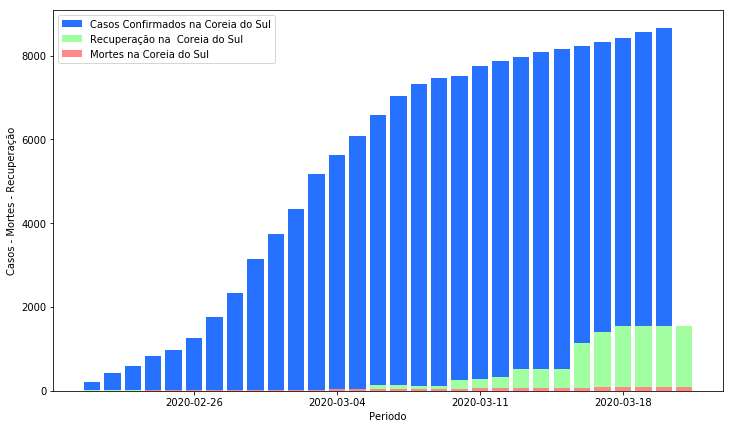

In [23]:
plt.bar(data_dias_confirmados, casosCoreia, color="#2672ff", label = "Casos Confirmados na Coreia do Sul")
plt.bar(data_dias_recuperaco, recuperacaoCoreia, color="#a1ffa2", label = "Recuperação na  Coreia do Sul")
plt.bar(data_dias_mortes, mortesCoreia, color="#ff8987", label = "Mortes na Coreia do Sul")
plt.legend()

plt.xlabel('Periodo')
plt.ylabel('Casos - Mortes - Recuperação')

plt.savefig('Casos-Mortes-Recuperação na Coreia do Sul.png', dpi=300)

plt.show()